# Chapter 10 - Simple Linear Regression

## By Theophilos Milnes

## What does a Simple Linear Regression Model do?
#### It predicts unknown values, which are called "dependent variables," based on one or more values that are known, called "independent variables," using an equation.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = sns.load_dataset('diamonds')

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
* This special value measures the strength and type of the linear correlation between two variables.
* It can only range between 1.0 and -1.0.
* Strong positive correlations are indicated by an r-value of 1.0.
* Negative positive correlations are indicated by an r-value of -1.0.
* If the r-value is 0, then there is no correlation at all.

In [4]:
data.corr().head(7)

C:\Users\Neo\AppData\Local\Temp\ipykernel_21072\2426653550.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().head(7)


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


C:\Users\Neo\AppData\Local\Temp\ipykernel_21072\4212537628.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='Greens', cbar=False, fmt=f'.3f')


<Axes: >

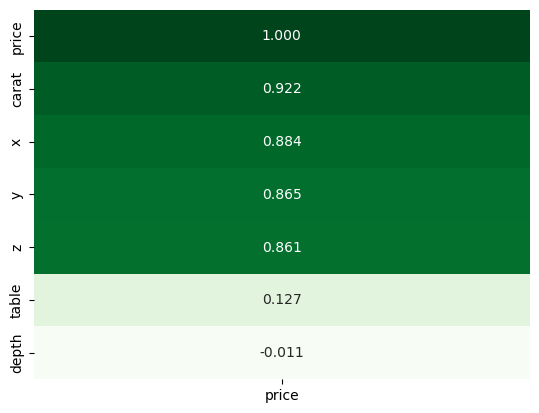

In [5]:
sns.heatmap(data=data.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='Greens', cbar=False, fmt=f'.3f')

## Procedure for Creating and Using a Regression Model
1. Split the dataset.
2. Create model from training dataset.
3. Validate model with test dataset.
4. If model is valid, then it can be used to predict data.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
x_train, x_test, y_train, y_test=train_test_split(data[['carat']], data[['price']], test_size=0.30, random_state=20)

In [8]:
model=LinearRegression()
print(model)

LinearRegression()


In [9]:
model.fit(x_train, y_train)

LinearRegression()

In [10]:
model.score(x_test, y_test)

0.8504107786474794

In [11]:
y_predict=model.predict(x_test)
y_predict

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [12]:
predict_price=pd.DataFrame(data=y_predict, columns=['predicted_price'])
predict_price.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [13]:
combined=predict_price.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
combined.head()

,predicted_price,carat,price
0,9540.641914,1.52,8674
1,1940.075433,0.54,1637
2,3180.984246,0.70,2657
3,2327.859437,0.59,1838
4,4421.893059,0.86,2980


In [14]:
melted=pd.melt(combined, id_vars=['carat'], value_vars=['price','predicted_price'], var_name='price_type', value_name='price_value')
melted

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


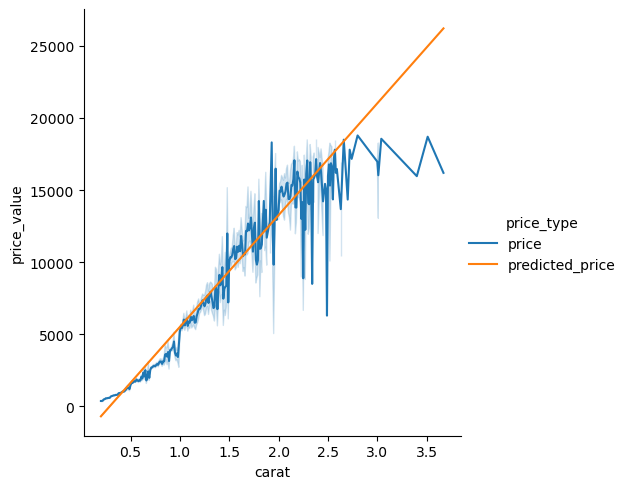

In [15]:
sns.relplot(data=melted, kind='line', x='carat', y='price_value', hue='price_type')

## Regression line equation is **y = mx + b**, where...
* y is the **dependent** variable
* m is the **slope** of the line
* x is the **independent** variable
* b is the **Y-intercept**

In [46]:
X=data.carat.values.reshape(-1,1)
y=data.price

In [47]:
lr=LinearRegression()
predicted=lr.fit(X,y)

In [48]:
m=predicted.coef_
b=predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800454247


In [49]:
print(f'Regression line is y = {m}x + {b}')

Regression line is y = [7756.42561797]x + -2256.3605800454247


In [50]:
# The two cells below show the closest that I could get to the desired output. Below THOSE cells, I will show what has consistently happened when I tried to use an f-string formatter.

In [51]:
y=m*0.70+b
print(f'The predicted price for a 0.70 carat diamond is ${y}')

The predicted price for a 0.70 carat diamond is $[3173.13735253]


In [52]:
y=m*0.54+b
print(f'The predicted price for a 0.54 carat diamond is ${y}')

The predicted price for a 0.54 carat diamond is $[1932.10925366]


As you can see, these values are close to the predicted price values we got after joining x_test and y_test to the price_predict dataset several cells ago.

In [53]:
# I will now input the same code with the f-string formatter.

In [54]:
y=m*0.70+b
print(f'The predicted price for a 0.70 carat diamond is ${y:.2f}')

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [55]:
y=m*0.54+b
print(f'The predicted price for a 0.54 carat diamond is ${y:.2f}')

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [56]:
# On my end, I am seeing two of the same error:

In [57]:
# ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# Cell In[53], line 2
#       1 y=m*0.70+b
# ----> 2 print(f'The predicted price for a 0.70 carat diamond is ${y:2.f}')
#
# TypeError: unsupported format string passed to numpy.ndarray.__format__

In [58]:
# ---------------------------------------------------------------------------
# TypeError                                 Traceback (most recent call last)
# Cell In[53], line 2
#       1 y=m*0.54+b
# ----> 2 print(f'The predicted price for a 0.54 carat diamond is ${y:2.f}')
#
# TypeError: unsupported format string passed to numpy.ndarray.__format__

In [ ]:
# I am unsure if you are getting the same error when you look at the document, but, despite the fact that that seems to be how to format f-strings according to every resource I found, I keep getting that same error.